<a href="https://colab.research.google.com/github/nokiddig/IT5-FTW/blob/main/traffic_sign_classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tải dataset và giải nén**

In [ ]:
!gdown https://drive.google.com/uc?id=1c1xAis_x_8AGA_QuCo0BQ0GjADzzqz7C

Downloading...
From: https://drive.google.com/uc?id=1c1xAis_x_8AGA_QuCo0BQ0GjADzzqz7C
To: /content/dataset.zip
100% 642M/642M [00:07<00:00, 87.8MB/s]


In [ ]:
!unzip dataset.zip

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png 

# **Importing necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# **Reading the Data**

In [ ]:
imgs_path = os.getcwd() + '/Train'
data_list = []
labels_list = []
classes_list = 43
for i in range(classes_list):
    i_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(i_path):
        im = Image.open(i_path +'/'+ img)
        im = im.resize((32,32))
        im = np.array(im)
        data_list.append(im)
        labels_list.append(i)
data = np.array(data_list)
labels = np.array(labels_list)

# **Data Visualization**

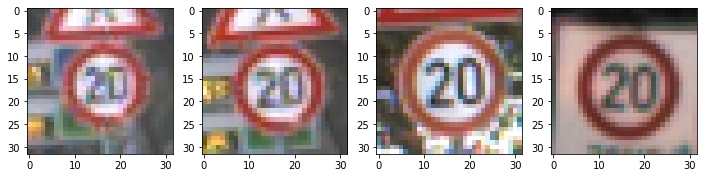

In [ ]:
plt.figure(figsize = (12,12))

for i in range(4) :
    plt.subplot(1, 4, i+1)
    plt.imshow(data[i], cmap='gray')

plt.show()

# **Preparing the Dataset**

In [ ]:
def prep_dataset(X,y):
    X_prep = X.astype('float32')
    y_prep = to_categorical(np.array(y))
    return (X_prep, y_prep)

X, y = prep_dataset(data,labels)

# **Splitting the dataset**

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X,y, test_size=0.2, shuffle=True,stratify=y)
X_val, X_test, Y_val, Y_test = train_test_split(X_val,Y_val, test_size=0.5, shuffle=True)

# **CNN Model**

In [ ]:
model = models.Sequential() #Sequential Model

#ConvLayer(64 filters) + MaxPooling + BatchNormalization + Dropout
model.add(layers.Conv2D(filters=32,kernel_size=3,activation='relu',padding='same',input_shape=X.shape[1:]))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

#ConvLayer(128 filters) + MaxPooling + BatchNormalization + Dropout
model.add(layers.Conv2D(filters=128,kernel_size=3,activation='relu',padding='same'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

#ConvLayer(512 filters) + Dropout + ConvLayer(512 filters) + MaxPooling + BatchNormalization
model.add(layers.Conv2D(filters=512,kernel_size=3,activation='relu',padding='same'))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=512,kernel_size=3,activation='relu',padding='same'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())

#Flatten
model.add(layers.Flatten())

#2 Dense layers with 4000 hidden units
model.add(layers.Dense(4000,activation='relu'))
model.add(layers.Dense(4000,activation='relu'))

#Dense layer with 1000 hidden units
model.add(layers.Dense(1000,activation='relu'))

#Softmax layer for output
model.add(layers.Dense(43,activation='softmax'))

# Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0

# **Fitting the model**

In [ ]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history= model.fit(X_train,Y_train,
                 epochs=20,
                 batch_size=64,
                 validation_data=(X_val,Y_val))


Epoch 1/20
491/491 [==============================] - 27s 31ms/step - loss: 1.5984 - accuracy: 0.5417 - val_loss: 0.4372 - val_accuracy: 0.8717
Epoch 2/20
491/491 [==============================] - 15s 30ms/step - loss: 0.2343 - accuracy: 0.9273 - val_loss: 0.1114 - val_accuracy: 0.9640
Epoch 3/20
491/491 [==============================] - 15s 30ms/step - loss: 0.1231 - accuracy: 0.9631 - val_loss: 0.0840 - val_accuracy: 0.9763
Epoch 4/20
491/491 [==============================] - 15s 30ms/step - loss: 0.0967 - accuracy: 0.9730 - val_loss: 0.0394 - val_accuracy: 0.9862
Epoch 5/20
491/491 [==============================] - 15s 30ms/step - loss: 0.0733 - accuracy: 0.9789 - val_loss: 0.0422 - val_accuracy: 0.9878
Epoch 6/20
491/491 [==============================] - 15s 31ms/step - loss: 0.0931 - accuracy: 0.9760 - val_loss: 0.1138 - val_accuracy: 0.9725
Epoch 7/20
491/491 [==============================] - 15s 31ms/step - loss: 0.0953 - accuracy: 0.9780 - val_loss: 0.0250 - val_accuracy:

# **Visualisation of accuracy and loss**

Text(0.5, 1.0, 'Loss')

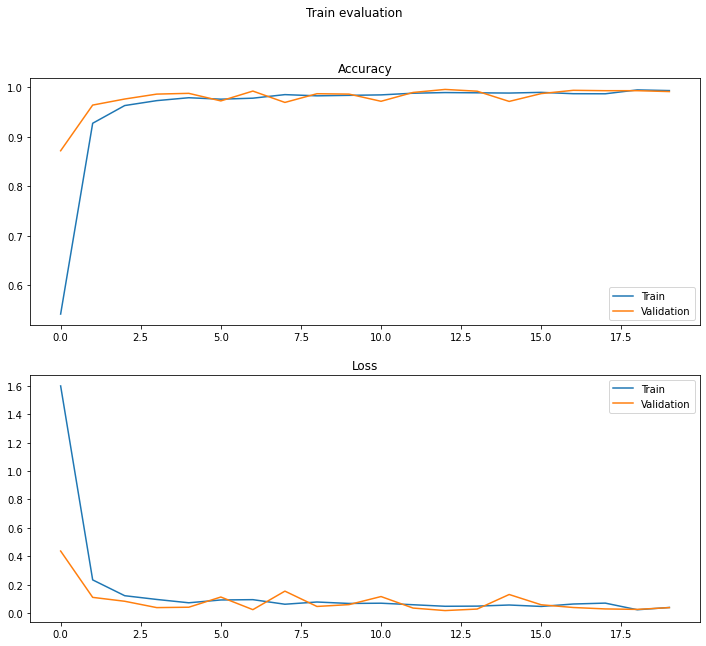

In [ ]:
fig, ax=plt.subplots(2,1,figsize=(12,10))
fig.suptitle('Train evaluation')

sns.lineplot(ax= ax[0],x=np.arange(0,len(history.history['accuracy'])),y=history.history['accuracy'])
sns.lineplot(ax= ax[0],x=np.arange(0,len(history.history['accuracy'])),y=history.history['val_accuracy'])

ax[0].legend(['Train','Validation'])
ax[0].set_title('Accuracy')

sns.lineplot(ax= ax[1],x=np.arange(0,len(history.history['loss'])),y=history.history['loss'])
sns.lineplot(ax= ax[1],x=np.arange(0,len(history.history['loss'])),y=history.history['val_loss'])

ax[1].legend(['Train','Validation'])
ax[1].set_title('Loss')


# **Prediction and Evaluation**

In [ ]:
Y_test = np.argmax(Y_test,axis=1)

Y_pred= model.predict(X_test)

Y_pred = np.argmax(Y_pred, axis=1)

print('-Acuracy achieved:', accuracy_score(Y_test,Y_pred) * 100)
print('-Accuracy by model was:', history.history['accuracy'][-1] * 100)
print('-Accuracy by validation was:', history.history['val_accuracy'][-1] * 100)

-Acuracy achieved: 98.75031879622546
-Accuracy by model was: 99.33369755744934
-Accuracy by validation was: 99.13287162780762


# **Save model**

In [ ]:
model.save('saved_model/my_model.h5')

# Test

In [ ]:
# Chay neu chua co model
!gdown https://drive.google.com/uc?id=1M1h_KGEjWtPouhVA1MSbL3jpEYw3rrta
model.

Downloading...
From: https://drive.google.com/uc?id=1M1h_KGEjWtPouhVA1MSbL3jpEYw3rrta
To: /content/my_model.h5
100% 670M/670M [00:16<00:00, 41.1MB/s]


In [ ]:
from PIL import Image
import numpy
from keras.models import load_model

model = load_model('my_model.h5')

classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

def classify(file_path):
  image = Image.open(file_path)
  image = image.resize((32,32))
  image = numpy.expand_dims(image, axis=0)
  image = numpy.array(image)
  pred = numpy.argmax(model.predict(image))
  sign = classes[pred + 1]
  print(sign)

file_path = 'camvuot.jpg'
classify(file_path)

No passing
